In [28]:
import tensorflow as tf
from tensorflow import keras

In [29]:
import numpy as np
import matplotlib.pyplot as plt

**IMDB 데이터셋을 준비하자**

In [30]:
NUM_WORDS = 1000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0
    return results

train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\kbs77\anaconda\envs\tensorf\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\kbs77\anaconda\envs\tensorf\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is 

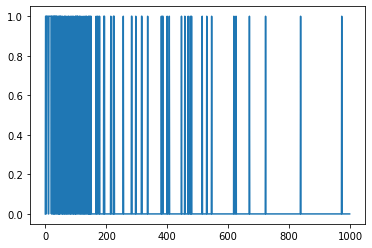

In [31]:
plt.plot(train_data[0])

**OVERFITTING**

MODEL

In [32]:
baseline_model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [33]:
baseline_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

In [34]:
baseline_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 16)                16016     
_________________________________________________________________
dense_22 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 17        
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________


In [35]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6120 - accuracy: 0.6700 - binary_crossentropy: 0.6120 - val_loss: 0.4848 - val_accuracy: 0.8112 - val_binary_crossentropy: 0.4848
Epoch 2/20
49/49 - 0s - loss: 0.3980 - accuracy: 0.8406 - binary_crossentropy: 0.3980 - val_loss: 0.3604 - val_accuracy: 0.8502 - val_binary_crossentropy: 0.3604
Epoch 3/20
49/49 - 0s - loss: 0.3303 - accuracy: 0.8637 - binary_crossentropy: 0.3303 - val_loss: 0.3320 - val_accuracy: 0.8602 - val_binary_crossentropy: 0.3320
Epoch 4/20
49/49 - 0s - loss: 0.3116 - accuracy: 0.8724 - binary_crossentropy: 0.3116 - val_loss: 0.3276 - val_accuracy: 0.8609 - val_binary_crossentropy: 0.3276
Epoch 5/20
49/49 - 0s - loss: 0.3034 - accuracy: 0.8764 - binary_crossentropy: 0.3034 - val_loss: 0.3308 - val_accuracy: 0.8601 - val_binary_crossentropy: 0.3308
Epoch 6/20
49/49 - 0s - loss: 0.2987 - accuracy: 0.8784 - binary_crossentropy: 0.2987 - val_loss: 0.3267 - val_accuracy: 0.8604 - val_binary_crossentropy: 0.3267
Epoch 7/20
49/49 - 0s - loss

SMALL MODEL

In [36]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [37]:
smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

In [38]:
smaller_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 4)                 4004      
_________________________________________________________________
dense_25 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 5         
Total params: 4,029
Trainable params: 4,029
Non-trainable params: 0
_________________________________________________________________


In [39]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6458 - accuracy: 0.6502 - binary_crossentropy: 0.6458 - val_loss: 0.5789 - val_accuracy: 0.7578 - val_binary_crossentropy: 0.5789
Epoch 2/20
49/49 - 0s - loss: 0.5112 - accuracy: 0.7974 - binary_crossentropy: 0.5112 - val_loss: 0.4531 - val_accuracy: 0.8263 - val_binary_crossentropy: 0.4531
Epoch 3/20
49/49 - 0s - loss: 0.4053 - accuracy: 0.8419 - binary_crossentropy: 0.4053 - val_loss: 0.3802 - val_accuracy: 0.8456 - val_binary_crossentropy: 0.3802
Epoch 4/20
49/49 - 0s - loss: 0.3513 - accuracy: 0.8609 - binary_crossentropy: 0.3513 - val_loss: 0.3502 - val_accuracy: 0.8559 - val_binary_crossentropy: 0.3502
Epoch 5/20
49/49 - 0s - loss: 0.3268 - accuracy: 0.8682 - binary_crossentropy: 0.3268 - val_loss: 0.3376 - val_accuracy: 0.8596 - val_binary_crossentropy: 0.3376
Epoch 6/20
49/49 - 0s - loss: 0.3139 - accuracy: 0.8729 - binary_crossentropy: 0.3139 - val_loss: 0.3327 - val_accuracy: 0.8594 - val_binary_crossentropy: 0.3327
Epoch 7/20
49/49 - 0s - loss

BIG MODEL

In [40]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [41]:
bigger_model.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy', 'binary_crossentropy'])

In [42]:
bigger_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 512)               512512    
_________________________________________________________________
dense_28 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 513       
Total params: 775,681
Trainable params: 775,681
Non-trainable params: 0
_________________________________________________________________


In [60]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                 epochs=30,
                                 batch_size=512,
                                 validation_data=(test_data, test_labels),
                                 verbose=2)

Epoch 1/30
49/49 - 1s - loss: 2.7317e-06 - accuracy: 1.0000 - binary_crossentropy: 2.7317e-06 - val_loss: 1.1412 - val_accuracy: 0.8522 - val_binary_crossentropy: 1.1412
Epoch 2/30
49/49 - 1s - loss: 2.5740e-06 - accuracy: 1.0000 - binary_crossentropy: 2.5740e-06 - val_loss: 1.1462 - val_accuracy: 0.8522 - val_binary_crossentropy: 1.1462
Epoch 3/30
49/49 - 1s - loss: 2.4290e-06 - accuracy: 1.0000 - binary_crossentropy: 2.4290e-06 - val_loss: 1.1513 - val_accuracy: 0.8524 - val_binary_crossentropy: 1.1513
Epoch 4/30
49/49 - 1s - loss: 2.2953e-06 - accuracy: 1.0000 - binary_crossentropy: 2.2953e-06 - val_loss: 1.1563 - val_accuracy: 0.8524 - val_binary_crossentropy: 1.1563
Epoch 5/30
49/49 - 1s - loss: 2.1690e-06 - accuracy: 1.0000 - binary_crossentropy: 2.1690e-06 - val_loss: 1.1611 - val_accuracy: 0.8522 - val_binary_crossentropy: 1.1611
Epoch 6/30
49/49 - 1s - loss: 2.0523e-06 - accuracy: 1.0000 - binary_crossentropy: 2.0523e-06 - val_loss: 1.1659 - val_accuracy: 0.8522 - val_binary_c

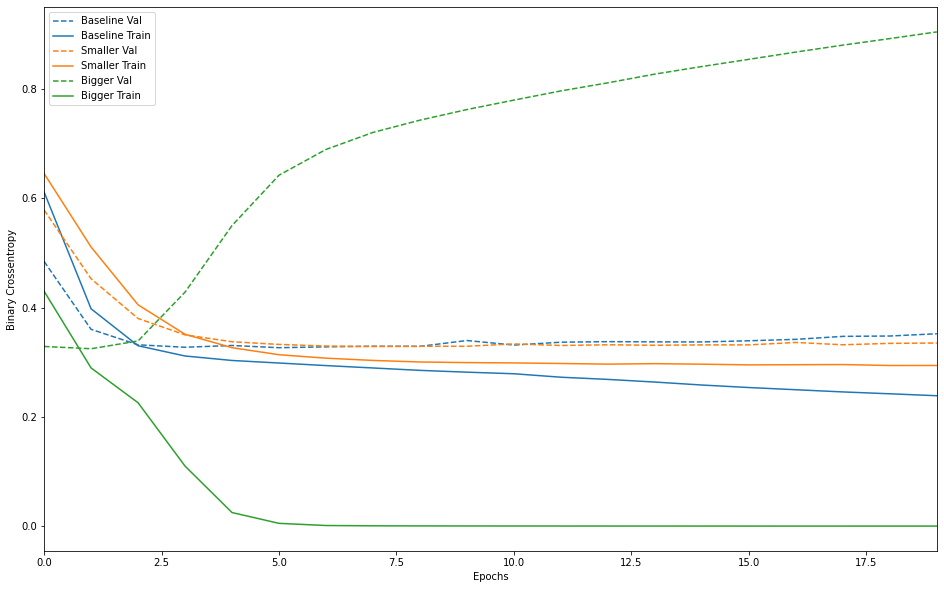

In [44]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

**Overfitting을 막자**

weight규제

In [45]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [46]:
l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

In [47]:
l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6461 - accuracy: 0.6894 - binary_crossentropy: 0.6037 - val_loss: 0.4956 - val_accuracy: 0.8146 - val_binary_crossentropy: 0.4549
Epoch 2/20
49/49 - 0s - loss: 0.4162 - accuracy: 0.8436 - binary_crossentropy: 0.3754 - val_loss: 0.3832 - val_accuracy: 0.8566 - val_binary_crossentropy: 0.3427
Epoch 3/20
49/49 - 0s - loss: 0.3613 - accuracy: 0.8668 - binary_crossentropy: 0.3215 - val_loss: 0.3680 - val_accuracy: 0.8614 - val_binary_crossentropy: 0.3293
Epoch 4/20
49/49 - 0s - loss: 0.3474 - accuracy: 0.8720 - binary_crossentropy: 0.3097 - val_loss: 0.3644 - val_accuracy: 0.8614 - val_binary_crossentropy: 0.3275
Epoch 5/20
49/49 - 0s - loss: 0.3416 - accuracy: 0.8743 - binary_crossentropy: 0.3054 - val_loss: 0.3627 - val_accuracy: 0.8610 - val_binary_crossentropy: 0.3274
Epoch 6/20
49/49 - 0s - loss: 0.3376 - accuracy: 0.8754 - binary_crossentropy: 0.3029 - val_loss: 0.3616 - val_accuracy: 0.8609 - val_binary_crossentropy: 0.3276
Epoch 7/20
49/49 - 0s - loss

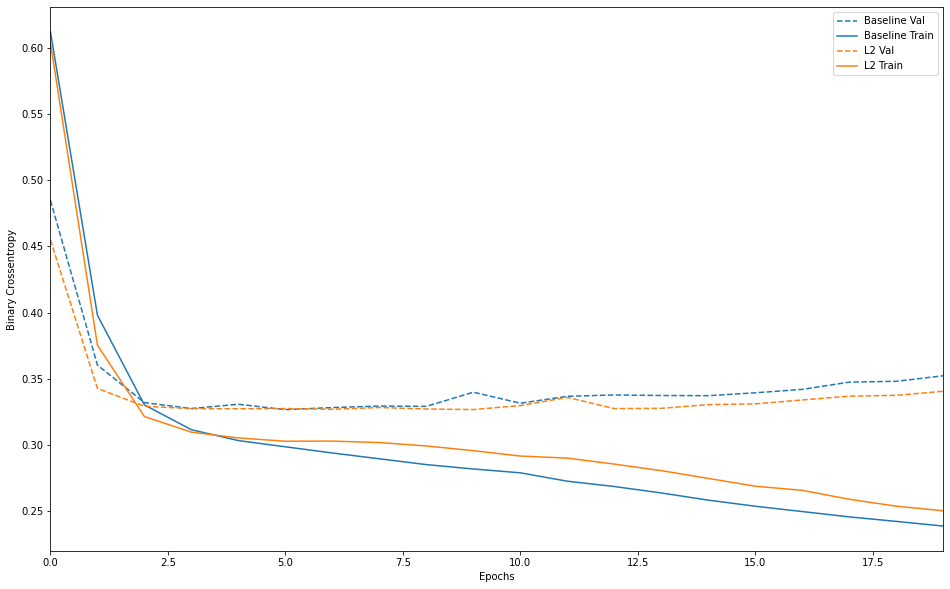

In [48]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

dropout

In [49]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

In [50]:
dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

In [51]:
dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6863 - accuracy: 0.5392 - binary_crossentropy: 0.6863 - val_loss: 0.6488 - val_accuracy: 0.7169 - val_binary_crossentropy: 0.6488
Epoch 2/20
49/49 - 0s - loss: 0.6148 - accuracy: 0.6522 - binary_crossentropy: 0.6148 - val_loss: 0.5099 - val_accuracy: 0.8124 - val_binary_crossentropy: 0.5099
Epoch 3/20
49/49 - 0s - loss: 0.5249 - accuracy: 0.7408 - binary_crossentropy: 0.5249 - val_loss: 0.4191 - val_accuracy: 0.8421 - val_binary_crossentropy: 0.4191
Epoch 4/20
49/49 - 0s - loss: 0.4662 - accuracy: 0.7884 - binary_crossentropy: 0.4662 - val_loss: 0.3679 - val_accuracy: 0.8527 - val_binary_crossentropy: 0.3679
Epoch 5/20
49/49 - 0s - loss: 0.4321 - accuracy: 0.8108 - binary_crossentropy: 0.4321 - val_loss: 0.3490 - val_accuracy: 0.8572 - val_binary_crossentropy: 0.3490
Epoch 6/20
49/49 - 0s - loss: 0.4038 - accuracy: 0.8306 - binary_crossentropy: 0.4038 - val_loss: 0.3366 - val_accuracy: 0.8582 - val_binary_crossentropy: 0.3366
Epoch 7/20
49/49 - 0s - loss

추가적인 실험

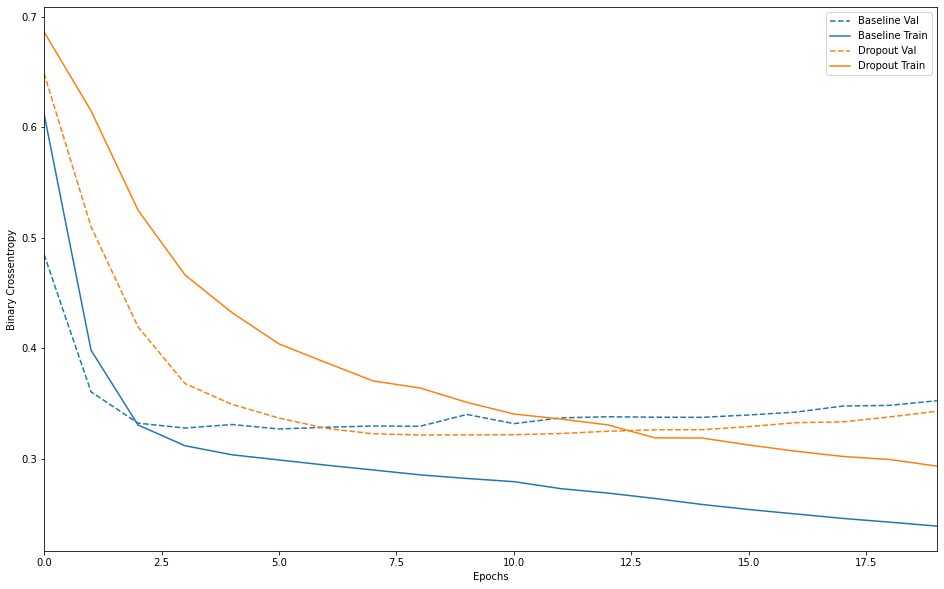

In [52]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])

In [53]:
Vsmalldropout_model = keras.models.Sequential([
    keras.layers.Dense(2, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.15),
    keras.layers.Dense(2, activation='relu'),
    keras.layers.Dropout(0.15),
    keras.layers.Dense(1, activation='sigmoid')
])

In [54]:
Vsmalldropout_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

In [59]:
Vsmalldropout_model_history = Vsmalldropout_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Epoch 1/20
49/49 - 0s - loss: 0.4759 - accuracy: 0.8092 - binary_crossentropy: 0.4759 - val_loss: 0.4380 - val_accuracy: 0.8592 - val_binary_crossentropy: 0.4380
Epoch 2/20
49/49 - 0s - loss: 0.4734 - accuracy: 0.8080 - binary_crossentropy: 0.4734 - val_loss: 0.4322 - val_accuracy: 0.8589 - val_binary_crossentropy: 0.4322
Epoch 3/20
49/49 - 0s - loss: 0.4662 - accuracy: 0.8117 - binary_crossentropy: 0.4662 - val_loss: 0.4258 - val_accuracy: 0.8593 - val_binary_crossentropy: 0.4258
Epoch 4/20
49/49 - 0s - loss: 0.4645 - accuracy: 0.8104 - binary_crossentropy: 0.4645 - val_loss: 0.4242 - val_accuracy: 0.8571 - val_binary_crossentropy: 0.4242
Epoch 5/20
49/49 - 0s - loss: 0.4583 - accuracy: 0.8109 - binary_crossentropy: 0.4583 - val_loss: 0.4168 - val_accuracy: 0.8587 - val_binary_crossentropy: 0.4168
Epoch 6/20
49/49 - 0s - loss: 0.4569 - accuracy: 0.8140 - binary_crossentropy: 0.4569 - val_loss: 0.4136 - val_accuracy: 0.8584 - val_binary_crossentropy: 0.4136
Epoch 7/20
49/49 - 0s - loss

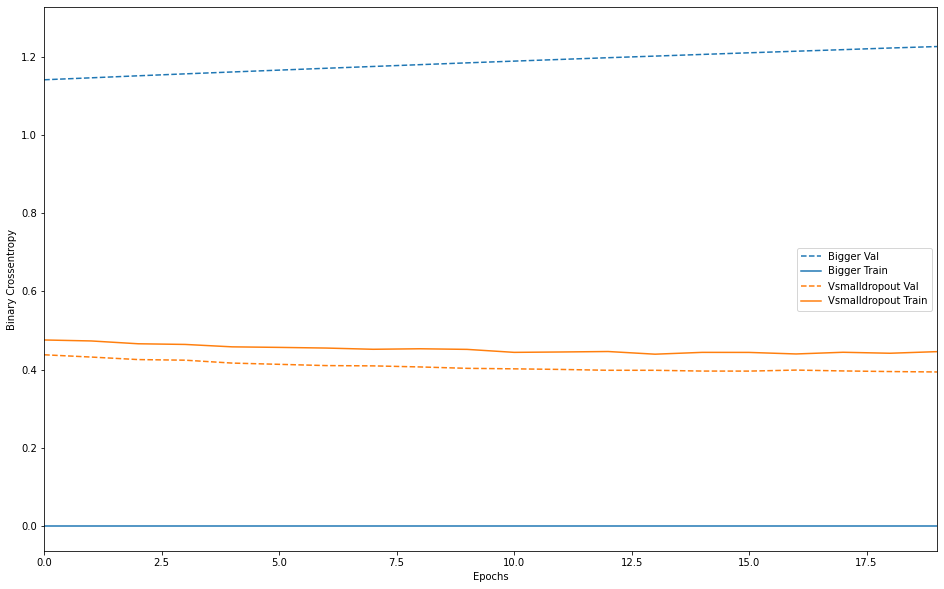

In [64]:
plot_history([('bigger', bigger_history),
              ('Vsmalldropout', Vsmalldropout_model_history)])